In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
from scipy.interpolate import splrep, BSpline
import numpy as np
from scipy import stats
import random
import math
from footprint_filter import filter_by_footprint
from voidiness import voidy_analysis
import pickle
import matplotlib.patches as mpatches

In [ ]:
sdss_dr16 = pd.read_excel('exported_dataFrames/sdss_dr16_w_voidiness.xlsx')
four_lac = pd.read_excel('exported_dataFrames/4lac_w_voidiness.xlsx')

In [ ]:
hard_xrays = pd.read_excel('exported_dataFrames/SBAT104_w_voidiness.xlsx')
soft_xrays = pd.read_excel('exported_dataFrames/ROMABZCAT_w_voidiness.xlsx')

In [ ]:
print(len(sdss_dr16))
sdss_dr16 = sdss_dr16.drop_duplicates(subset=['RAdeg', 'DEdeg'], keep='first')
print(len(sdss_dr16))

In [ ]:
print(len(four_lac))
four_lac = four_lac.drop_duplicates(subset=['RAdeg', 'DEdeg'], keep='first')
print(len(four_lac))

In [ ]:
print(len(soft_xrays))
soft_xrays = soft_xrays.drop_duplicates(subset=['RAdeg', 'DEdeg'], keep='first')
print(len(soft_xrays))

In [ ]:
print(len(hard_xrays))
hard_xrays = hard_xrays.drop_duplicates(subset=['RAdeg', 'DEdeg'], keep='first')
print(len(hard_xrays))

In [ ]:
# Read in variables
with open('stats/simulated_data/nontev_only_w_voidiness_simulated_data.pkl', 'rb') as f:
    mc_nontev = pickle.load(f)

with open('stats/simulated_data/ROMABZCAT_w_voidiness_simulated_data.pkl', 'rb') as f:
    mc_soft_xrays = pickle.load(f)

with open('stats/simulated_data/SBAT104_w_voidiness_simulated_data.pkl', 'rb') as f:
    mc_hard_xrays = pickle.load(f)

with open('stats/simulated_data/4lac_w_voidiness_simulated_data.pkl', 'rb') as f:
    mc_four_lac = pickle.load(f)

with open('stats/simulated_data/TeV_list_simulated_data.pkl','rb') as f:
    mc_tev = pickle.load(f)
# with open('stats/simulated_data/4lac_w_voidiness_simulated_data.pkl', 'rb') as f:
#     mc_four_lac = pickle.load(f)

In [ ]:
catalogs = ["Four_LAC","TEV_Sources", "NON_TEV_Sources", "SDSS_DR16_QSR","SDSS_DR16_GLX", "ROMABZCAT", "SBAT105"]
stat_nums = ["Statistic", "pvalue"]
statistics = pd.DataFrame(np.nan, columns=catalogs, index  =catalogs)
is_qsr = sdss_dr16.AUTOCLASS_PQN == "QSO"
is_glx = sdss_dr16.AUTOCLASS_PQN == "GALAXY"
is_tev = four_lac.TeVflag == 1
is_not_tev = np.isnan(four_lac.TeVflag)
data = [four_lac.Voidiness
        ,four_lac.Voidiness[is_tev]
        ,four_lac.Voidiness[is_not_tev]
        ,sdss_dr16.Voidiness[is_qsr]
        ,sdss_dr16.Voidiness[is_glx]
        ,soft_xrays.Voidiness
        ,hard_xrays.Voidiness
        ]
other_data = [four_lac.Voidiness[is_tev]
              ,four_lac.Voidiness[is_not_tev]
              ,soft_xrays.Voidiness
              ,hard_xrays.Voidiness]
big_mc_data = [mc_tev, mc_nontev, mc_soft_xrays, mc_hard_xrays]

In [ ]:
catalogs = ["TeV", "Non-TeV", "soft_xrays", "Hard_xrays"]



In [ ]:
# TODO: TEST IF THIS LOOP IS DOING THE COMPARISONS WE THINK ITS DOING
ks_table = {}
p_vals = {}
statistics = {}
for i in range(len(other_data)):
    temp = {}
    tempks = {}
    tempie ={}
    for j in range(i, len(big_mc_data)):
        stt =  stats.ks_2samp(other_data[i], big_mc_data[j])
        temp[catalogs[j]] = (stt[0], stt[1])
        tempks[catalogs[j]] = stt[0]
        tempie[catalogs[j]] = stt[1]
        # print(catalogs[i], catalogs[j], stats.ks_2samp(data[i], data[j]))
    statistics[catalogs[i]] = temp
    ks_table[catalogs[i]] = tempks
    p_vals[catalogs[i]] = tempie

In [ ]:
stats_table = pd.DataFrame(statistics)

In [ ]:
stats_table

In [ ]:
kssies = pd.DataFrame(ks_table)
kssies.to_excel("exported_dataFrames/KS_table.xlsx")
p_vals = pd.DataFrame(p_vals)
p_vals.to_excel("exported_dataFrames/P_vals.xlsx")

In [ ]:
kssies

In [ ]:
p_vals

In [ ]:
# Taken from custom_functions.py and modified for our purposes, 
# Since I've making new scripts for everything custom_functions is kind of depecrated
# and I didn't want to break it. 

def rand_long_and_lat(n, seeded=False, seed = 567307250717):
    """
    Generates number of longitude and latitude coordinates in degrees for entire pandasDF
    """
    if seeded:
        seed = seed # Using seed while debugging
    else:
        seed = None

    rng = np.random.default_rng(seed) 
    theta = np.arccos(1 - 2 * rng.uniform(0, 1, n)) * (180/math.pi) # COLAT
    b = 90 - theta
    l = rng.uniform(0, 360, n)
    return (l, b)
# Randomize

def gen_filtered_ra_deg(n):
    randRA, randDE = rand_long_and_lat(n)
    temp_cel = pd.DataFrame({'RAdeg': randRA, 'DEdeg': randDE})
    temp_cel = filter_by_footprint(temp_cel, 'exported_dataFrames/footprint_points_void_centers.xlsx')
    return temp_cel

In [ ]:
# # Monte Carlo of TEV
# voids = pd.read_excel('exported_dataFrames/voids.xlsx')
# master_TEV_Carlo = four_lac[four_lac.TeVflag == 1].copy()

# run_n = 0
# mc_voidiness = np.array([])
# n_galxy = len(master_TEV_Carlo)


In [ ]:
# # First monte carlo run. Depecrated after run_monte_carlo has been written
# while True:
#     coords = gen_filtered_ra_deg(100000)
#     coords_idx = coords.index.tolist()
#     while len(coords_idx) > n_galxy:
#         fresh_coords_idx = coords_idx[:n_galxy]
#         coords_idx = coords_idx[n_galxy:]

#         master_TEV_Carlo['RAdeg'] = coords.RAdeg[fresh_coords_idx].values
#         master_TEV_Carlo['DEdeg'] = coords.DEdeg[fresh_coords_idx].values
#         mc_voidiness = np.append(mc_voidiness, voidy_analysis(voids, master_TEV_Carlo).Voidiness.values) # This one takes about 6s per run
#         run_n += 1
#     # print(run_n)

In [ ]:
def ret_sim_bin_heights(mc_vals, n_galxy, binning, cflag, show=True):
    """Returns the bin heights and plots them"""
    sim_bin_heights = []
    for i in range(int(len(mc_vals)/n_galxy)):
        temp = plt.hist([mc_vals[i*n_galxy:n_galxy*(i+1)]], 
                            bins = binning, 
                            density=True, 
                            stacked = False,
                            histtype='step',
                            cumulative=cflag, alpha=0.01, color='0.5')
        sim_bin_heights.append(temp[0])
    if show:
        # plt.show()
        pass
    else:
        plt.clf()  
    return sim_bin_heights

In [ ]:
start = 0
end = 1
num = 10
binning = np.linspace(start,end,num)

sigma_vals = [34.1, 34.1+13.6]
observed_data = four_lac.Voidiness[four_lac.TeVflag == 1]
observed_label = "Observed TeV"
len_data = len(observed_data)
mc_data = mc_tev
plot_median = True
median_c = 'g'
cflag = False # cumulative
show_sim_overlay = False
fill_btwn_c = 'b'
fill_alpha = 0.1
plot_sdss = False
sdss_color = "k"

# Plot parameters
title = '4LAC Non-TeV Sources'
xlabel = 'Voidiness [$D_{\\rm Void}/D_{\\rm Total}$] '
ylabel = 'Normalized Fraction'
appended_label = 'Simulated 4LAC Non-TeV'


def plot_everything(num = 10
                    ,binning = np.linspace(start,end,num)
                    ,sigma_vals = [34.1, 34.1+13.6]
                    ,observed_data = four_lac.Voidiness[four_lac.TeVflag == 1]
                    ,observed_label = "Observed TeV"
                    ,observed_color = "magenta"
                    ,len_data = len(observed_data)
                    ,mc_data = mc_tev
                    ,plot_median = True
                    ,median_c = 'g'
                    ,cflag = False # cumulative
                    ,show_sim_overlay = False
                    ,fill_btwn_c = 'b'
                    ,fill_alpha = 0.1
                    ,title = '4LAC Non-TeV Sources'
                    ,xlabel = 'Voidiness [$D_{\\rm Void}/D_{\\rm Total}$] '
                    ,ylabel = 'Normalized Fraction'
                    ,appended_label = 'Simulated 4LAC Non-TeV'
                    ,plot_sdss_qsr = False
                    ,sdss_qsr_color = 'k'
                    ,sdss_glx_color = 'orange'
                    ,plot_sdss_glx = False
                    ,save = True
                    ,all_sim_c='cyan'):
    global is_qsr, is_glx
    sim_bin_heights = ret_sim_bin_heights(mc_data, len_data, binning, cflag, show = show_sim_overlay)

    plt.hist(observed_data, 
                        bins = binning, 
                        density=True, 
                        stacked = False,
                        histtype='step', label=observed_label,
                        cumulative=cflag, color = observed_color)

    if plot_sdss_qsr:
        plt.hist([sdss_dr16.Voidiness[is_qsr]]
                , bins = binning
                , density=True
                , stacked = False
                , histtype='step'
                , label="SDSS DR16 (QSR) Observed"
                , cumulative=cflag, color=sdss_qsr_color)
    if plot_sdss_glx:
        plt.hist([sdss_dr16.Voidiness[is_glx]]
                , bins = binning
                , density=True
                , stacked = False
                , histtype='step'
                , label="SDSS DR16 (GLX) Observed"
                , cumulative=cflag, color=sdss_glx_color)
    
    plt.hist(mc_data
             , bins = binning
             , density=True
             , stacked = False
             , histtype='step'
             , label="All Simulated"
             , cumulative=cflag, color=all_sim_c)
    org = []
    for i in range(num-1):
        org.append([[heights[i] for heights in sim_bin_heights]])

    medians = []
    for i in range(num-1):
        medians.append(np.median(org[i]))
    
    ks, p = stats.ks_2samp(observed_data, mc_data)

    # Plot the sigma bands
    lab = ['1 $\sigma$', '2 $\sigma$']
    for s, l in zip(sigma_vals, lab):
        hi_sig = []
        low_sig = []
        for i in range(num-1):
            # Calculate the upper 1 sigma
            hi_sig.append(np.percentile(org[i], [50 + s])[0])
            # Lower
            low_sig.append(np.percentile(org[i], [50 - s])[0])
        plt.fill_between(binning[:-1], hi_sig, low_sig
                        , step="post"
                        , alpha = fill_alpha
                        , color = fill_btwn_c
                        , label=l
                        #  , edgecolor = 'orange'
                        )
        # TODO: Save the calculated sigma values. They are discarded after plotting


    # CONVENTION
    # Median happens at left of bin, y value held towards the right of point until 
    # start of next bin. Hence, i exclude the leftmost bin edge

    if plot_median:
        plt.step(binning[:-1], medians, where="post", label="Median of Sim. Data", color = median_c) 

    # Add the greay patches to the legend
    if show_sim_overlay:
        grey_patch = mpatches.Patch(color='grey', alpha = 0.5, label='Simulated 4LAC Non-TeV')
        handles, labels = plt.gca().get_legend_handles_labels()
        handles.append(grey_patch)
        labels.append(appended_label)
        plt.legend(handles=handles, labels=labels)
    else:
        plt.legend()
    if cflag:
        plt.ylabel("Empirical Cumulative Distribution Function")
    else:
        plt.ylabel(ylabel)
    
    plt.xlabel(xlabel)
    plt.title(title+ f"\nKS: {ks:.2}\np: {p:.2e}")
    plt.grid()
    plt.text(0.3, 0.8, "Preliminary",  # Adjust the position as needed
                    fontsize=30, color='gray', alpha=0.5,
                    ha='center', va='center', transform=plt.gca().transAxes)
    if cflag:
        fn = title+"CDF.png"
    else:
        fn = title+"NormalHistogram.png"
    
    if save:
        plt.savefig("stats/stats_fig/"+fn)

def get_median_of_sim_data(sim_bin_heights, num):
    org = []
    for i in range(num-1):
        org.append([[heights[i] for heights in sim_bin_heights]])

    medians = []
    for i in range(num-1):
        medians.append(np.median(org[i]))
    return medians


In [279]:
def plot_in_cdf(array_of_dfs, cdfbins
                , zbins
                # , title=None
                , labels
                , cflag=True
                # , xlabel = "Voidiness"
                ):
    for i in range(len(zbins)-1):
        plt.figure() 
        for j in range(len(array_of_dfs)):
             df = array_of_dfs[j]
             mask = (df.z < zbins[i+1]) & (df.z > zbins[i])
 
             plt.hist(df.Voidiness[mask]
                    , bins = cdfbins
                    , density=True
                    , stacked = False
                    , histtype='step'
                    , label=labels[j]
                    , cumulative=cflag
                    )
        plt.legend()
        plt.grid()
        plt.title(f"z:{zbins[i]:.2f} - {zbins[i+1]:.2f} ")

        plt.ylabel("Emperical Cumulative Distribution Function")
        plt.xlabel("Voidiness")

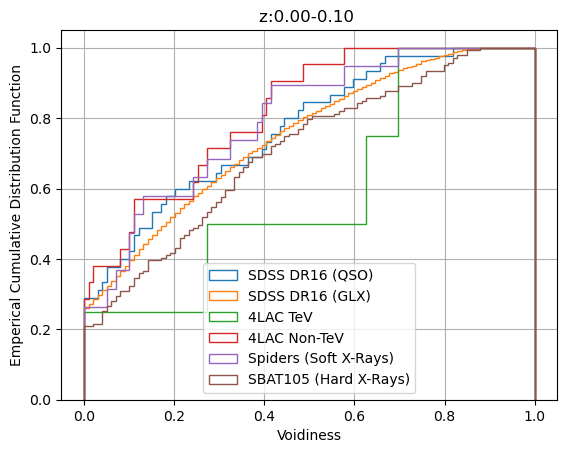

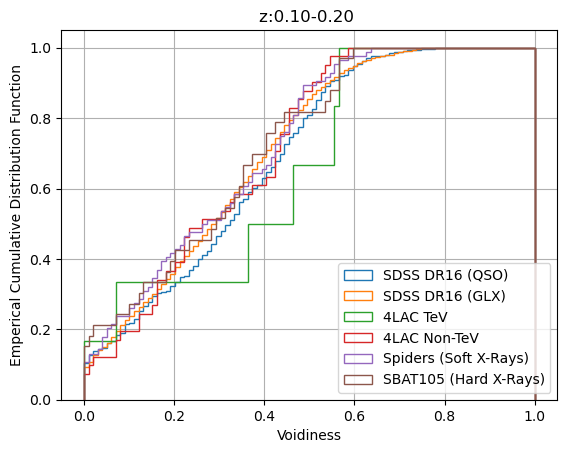

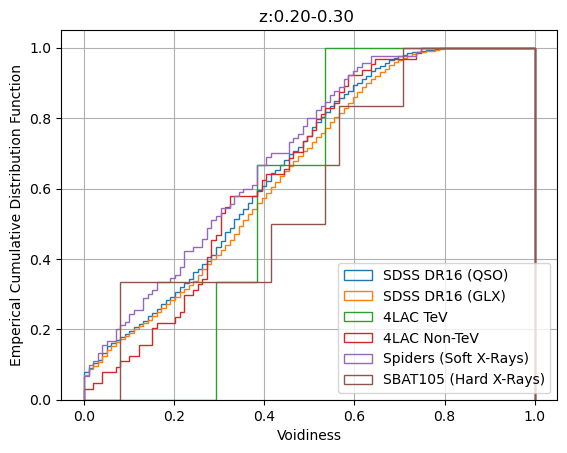

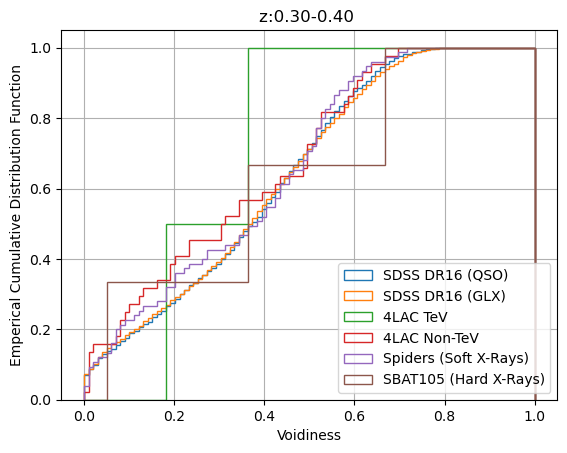

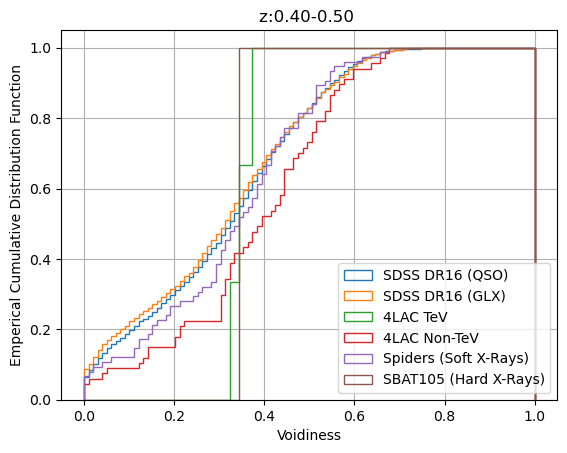

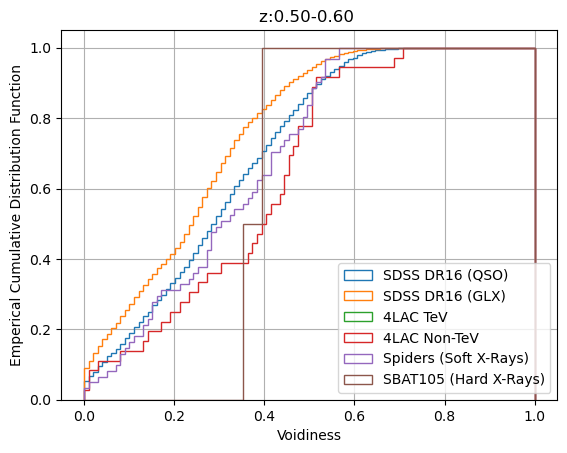

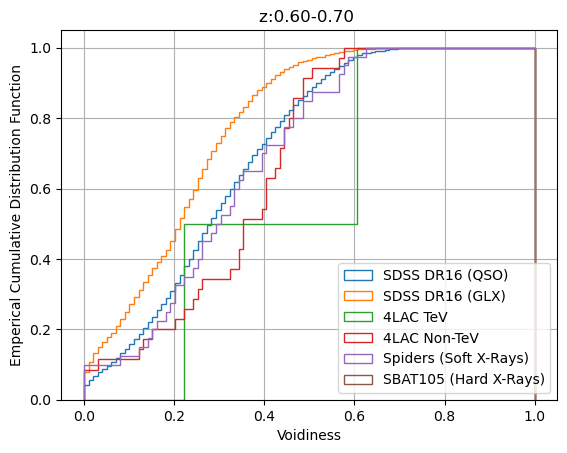

In [283]:
cdfbins = np.linspace(0,1,100)
plot_in_cdf([sdss_dr16[is_qsr]
             , sdss_dr16[is_glx]
             , four_lac[is_tev]
             , four_lac[~is_tev]
             , soft_xrays
             , hard_xrays
             ]
             , cdfbins
             ,labels=["SDSS DR16 (QSO)"
                      ,"SDSS DR16 (GLX)"
                      , "4LAC TeV"
                      , "4LAC Non-TeV"
                      , "Spiders (Soft X-Rays)"
                      , "SBAT105 (Hard X-Rays)"]
             , zbins=np.linspace(0, 0.7, 8))

In [272]:
np.linspace(0, 0.7, 8)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])

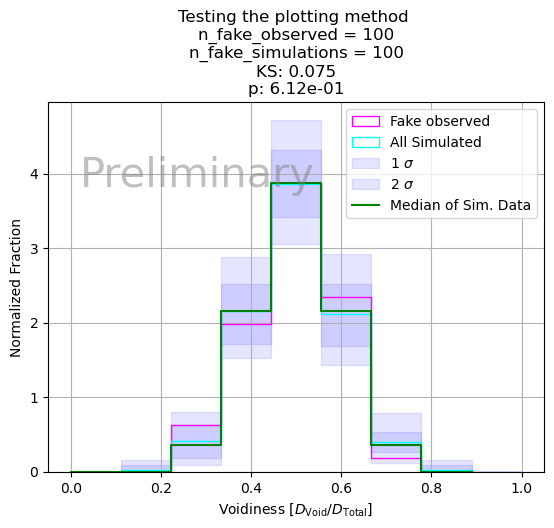

In [252]:
# Testing the ploting

sig = 0.1
start = 0
end = 1
num = 10

binning = np.linspace(start,end,num)
sigma_vals = [34.1, 34.1+13.6]
num_fake_data = 100
num_fake_sampling = 100
observed_data = np.random.normal(0.5, sig, num_fake_data)
observed_label = "Fake observed"
observed_color = "magenta"
len_data = len(observed_data)
mc_data = np.random.normal(0.5, sig, num_fake_data*num_fake_sampling)
plot_median = True
median_c = 'g'
cflag = False # cumulative
show_sim_overlay = False
fill_btwn_c = 'b'
fill_alpha = 0.1
plot_sdss = False
sdss_color = "k"
# Plot parameters
title = f'Testing the plotting method \nn_fake_observed = {num_fake_data}\nn_fake_simulations = {num_fake_sampling}'
xlabel = 'Voidiness [$D_{\\rm Void}/D_{\\rm Total}$] '
ylabel = 'Normalized Fraction'
appended_label = 'Simulated 4LAC TeV'

plot_everything(num
                ,binning
                , sigma_vals
                , observed_data
                , observed_label
                , observed_color
                , len_data
                , mc_data
                , plot_median
                , median_c
                , cflag
                , show_sim_overlay
                , fill_btwn_c
                , fill_alpha
                , title
                , xlabel
                , ylabel
                , appended_label
                , plot_sdss_glx= False
                , plot_sdss_qsr= False
                , save=False
                )

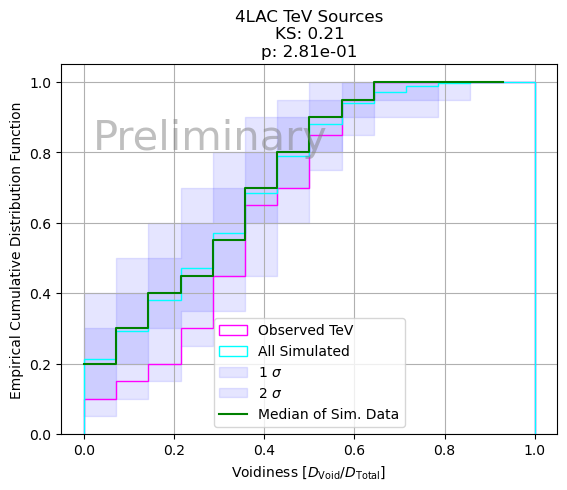

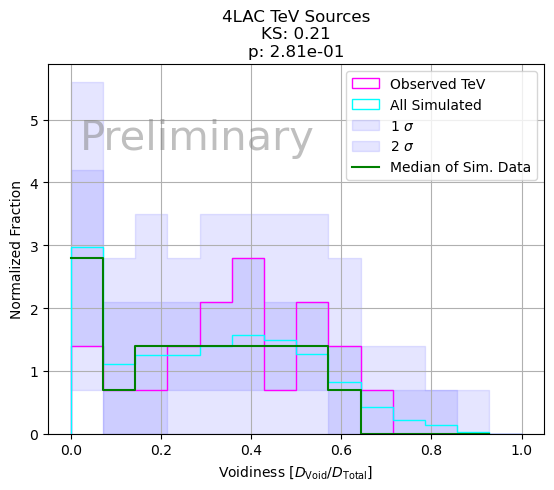

In [284]:
start = 0
end = 1
num = 15

binning = np.linspace(start,end,num)
sigma_vals = [34.1, 34.1+13.6]
observed_data = four_lac.Voidiness[four_lac.TeVflag == 1]
observed_label = "Observed TeV"
observed_color = "Magenta"
len_data = len(observed_data)
mc_data = mc_tev
plot_median = True
median_c = 'g'
cflag = True # cumulative
show_sim_overlay = False
fill_btwn_c = 'b'
fill_alpha = 0.1
plot_sdss = False
sdss_color = "k"
# Plot parameters
title = '4LAC TeV Sources'
xlabel = 'Voidiness [$D_{\\rm Void}/D_{\\rm Total}$] '
ylabel = 'Normalized Fraction'
appended_label = 'Simulated 4LAC TeV'

for oof in [True, False]:
    plt.figure()
    plot_everything(num
                    ,binning
                    , sigma_vals
                    , observed_data
                    , observed_label
                    , observed_color
                    , len_data
                    , mc_data
                    , plot_median
                    , median_c
                    , oof
                    , show_sim_overlay
                    , fill_btwn_c
                    , fill_alpha
                    , title
                    , xlabel
                    , ylabel
                    , appended_label
                    , plot_sdss_glx= False
                    , plot_sdss_qsr= False
                    , save=True
                    )


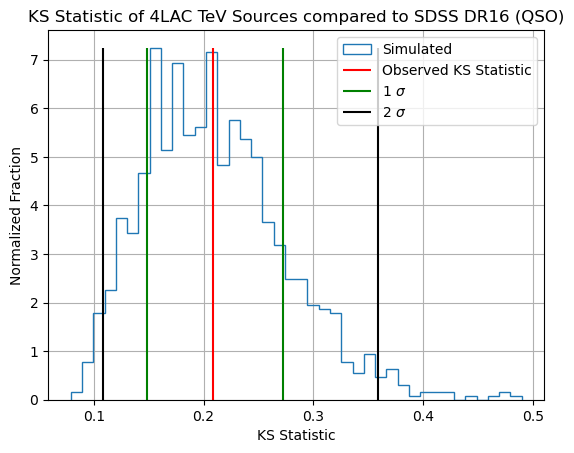

In [285]:
# 4lac TEV vs sdss

ks_stats = []
bins = 40

mc_data = mc_tev
stat_from_table = 0.209

len_data = len(four_lac[four_lac.TeVflag == 1])
for i in range(int(len(mc_data)/len_data)):
    ks_stats.append(stats.ks_2samp(sdss_dr16.Voidiness[is_qsr], mc_data[len_data*i:len_data*(i+1)])[0])


stats_on_stats = plt.hist(ks_stats, 
        bins = bins, 
        density=True, 
        stacked = False,
        histtype='step',
        cumulative=False,
        label="Simulated")
plt.ylabel("Normalized Fraction")
plt.xlabel("KS Statistic")
plt.title("KS Statistic of 4LAC TeV Sources compared to SDSS DR16 (QSO)")
plt.grid()
vline_height = max(stats_on_stats[0])
plt.vlines(stat_from_table, 0, vline_height, color="r", label = "Observed KS Statistic") # Grabbed from KS_2samp table above.

for sig, c, l in zip([34.1, 34.1+13.6], ["green", "black"], ["1 $\sigma$", "2 $\sigma$"]):
    perc = np.percentile(ks_stats, [50-sig])
    plt.vlines(perc, 0, vline_height, label=l, color=c)
    perc = np.percentile(ks_stats, [50+sig])
    plt.vlines(perc, 0, vline_height, color=c)

plt.legend()
plt.savefig('stats/stats_fig/KSTeV.png')

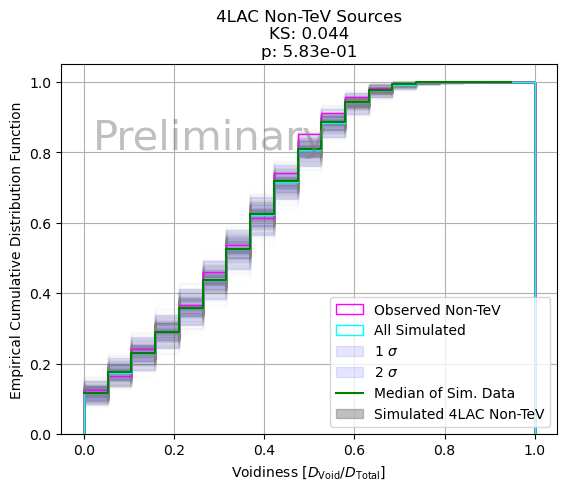

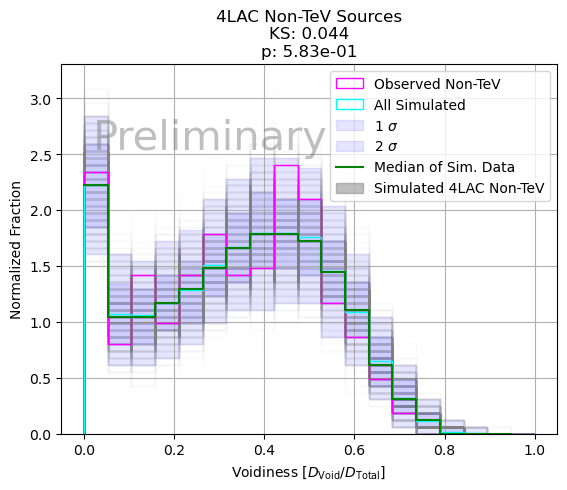

In [286]:
start = 0
end = 1
num = 20
binning = np.linspace(start,end,num)

sigma_vals = [34.1, 34.1+13.6]
observed_data = four_lac.Voidiness[np.isnan(four_lac.TeVflag)]
observed_label = "Observed Non-TeV"
observed_color = "magenta"
len_data = len(observed_data)
mc_data = mc_nontev
plot_median = True
median_c = 'g'
cflag = False # cumulative
show_sim_overlay = True
fill_btwn_c = 'b'
fill_alpha = 0.1
title = '4LAC Non-TeV Sources'
xlabel = 'Voidiness [$D_{\\rm Void}/D_{\\rm Total}$] '
ylabel = 'Normalized Fraction'
appended_label = 'Simulated 4LAC Non-TeV'

for oof in [True, False]:
    plt.figure()
    plot_everything(num
                    ,binning
                    , sigma_vals
                    , observed_data
                    , observed_label
                    , observed_color
                    , len_data
                    , mc_data
                    , plot_median
                    , median_c
                    , oof
                    , show_sim_overlay
                    , fill_btwn_c
                    , fill_alpha
                    , title
                    , xlabel
                    , ylabel
                    , appended_label
                    , plot_sdss_glx= False
                    , plot_sdss_qsr= False
                    )


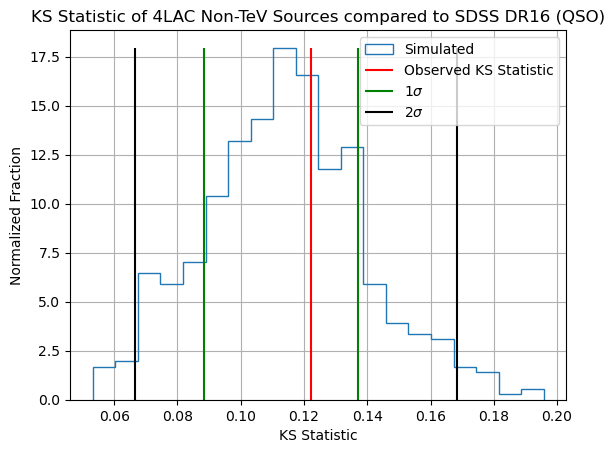

In [287]:
# 4lac TEV vs sdss

ks_stats = []
bins = 20

mc_data = mc_nontev
stat_from_table = 0.1222

len_data = len(four_lac[np.isnan(four_lac.TeVflag)])
for i in range(int(len(mc_data)/len_data)):
    ks_stats.append(stats.ks_2samp(sdss_dr16.Voidiness[is_qsr], mc_data[len_data*i:len_data*(i+1)])[0])


stats_on_stats = plt.hist(ks_stats, 
        bins = bins, 
        density=True, 
        stacked = False,
        histtype='step',
        cumulative=False,
        label="Simulated")
plt.ylabel("Normalized Fraction")
plt.xlabel("KS Statistic")
plt.title("KS Statistic of 4LAC Non-TeV Sources compared to SDSS DR16 (QSO)")
plt.grid()
vline_height = max(stats_on_stats[0])
plt.vlines(stat_from_table, 0, vline_height, color="r", label = "Observed KS Statistic") # Grabbed from KS_2samp table above.

for sig, c, l  in zip([34.1, 34.1+13.6], ["green", "black"], ["1$\sigma$","2$\sigma$"]):
    perc = np.percentile(ks_stats, [50-sig])
    plt.vlines(perc, 0, vline_height, label=l, color=c)
    perc = np.percentile(ks_stats, [50+sig])
    plt.vlines(perc, 0, vline_height, color=c)

plt.legend()
plt.savefig('stats/stats_fig/KSNonTeV.png')

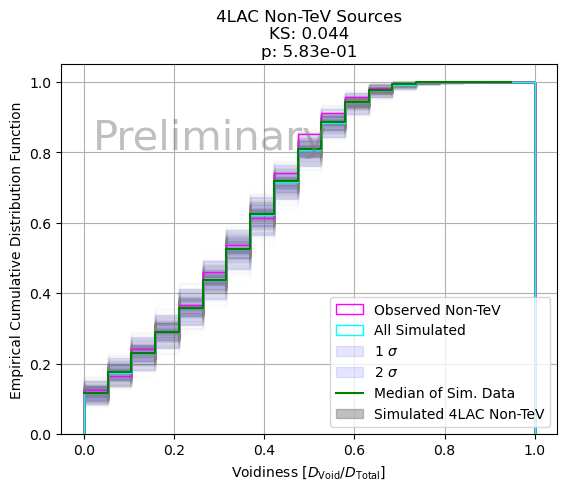

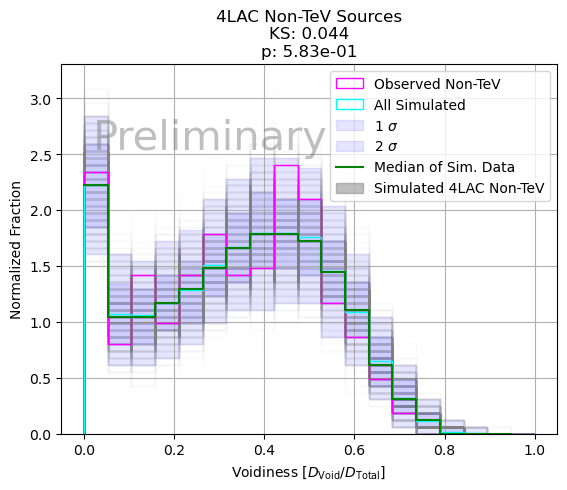

In [288]:
start = 0
end = 1
num = 20
binning = np.linspace(start,end,num)

sigma_vals = [34.1, 34.1+13.6]
observed_data = four_lac.Voidiness[np.isnan(four_lac.TeVflag)]
observed_label = "Observed Non-TeV"
observed_color = "magenta"
len_data = len(observed_data)
mc_data = mc_nontev
plot_median = True
median_c = 'g'
cflag = False # cumulative
show_sim_overlay = True
fill_btwn_c = 'b'
fill_alpha = 0.1
plot_sdss = True
sdss_color = 'k'
title = '4LAC Non-TeV Sources'
xlabel = 'Voidiness [$D_{\\rm Void}/D_{\\rm Total}$] '
ylabel = 'Normalized Fraction'
appended_label = 'Simulated 4LAC Non-TeV'

for oof in [True, False]:
    plt.figure()
    plot_everything(num
                    ,binning
                    , sigma_vals
                    , observed_data
                    , observed_label
                    , observed_color
                    , len_data
                    , mc_data
                    , plot_median
                    , median_c
                    , oof
                    , show_sim_overlay
                    , fill_btwn_c
                    , fill_alpha
                    , title
                    , xlabel
                    , ylabel
                    , appended_label
                    , plot_sdss_glx= False
                    , plot_sdss_qsr= False
                    )

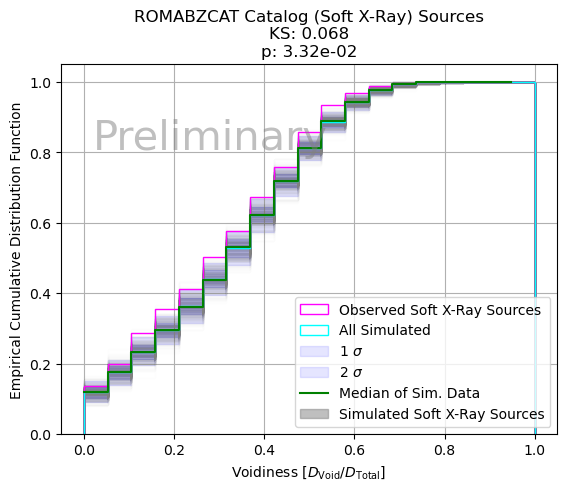

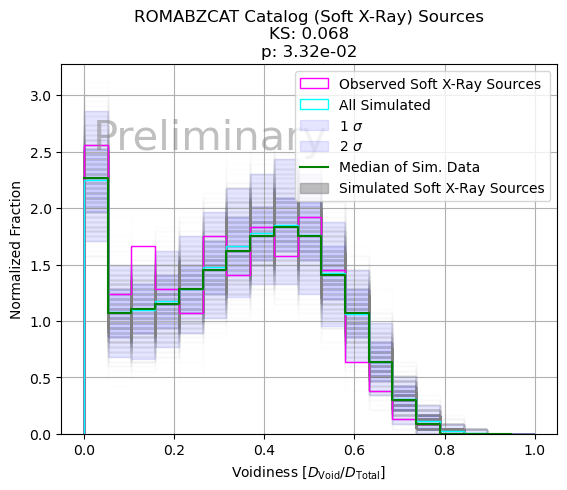

In [289]:
start = 0
end = 1
num = 20
binning = np.linspace(start,end,num)

sigma_vals = [34.1, 34.1+13.6]
observed_data = soft_xrays.Voidiness
observed_label = "Observed Soft X-Ray Sources"
observed_color = "magenta"
len_data = len(observed_data)
mc_data = mc_soft_xrays
plot_median = True
median_c = 'g'
cflag = False # cumulative
show_sim_overlay = True
fill_btwn_c = 'b'
fill_alpha = 0.1
plot_sdss = True
sdss_color = 'k'
title = 'ROMABZCAT Catalog (Soft X-Ray) Sources'
xlabel = 'Voidiness [$D_{\\rm Void}/D_{\\rm Total}$] '
ylabel = 'Normalized Fraction'
appended_label = 'Simulated Soft X-Ray Sources'

for oof in [True, False]:
    plt.figure()
    plot_everything(num
                    ,binning
                    , sigma_vals
                    , observed_data
                    , observed_label
                    , observed_color
                    , len_data
                    , mc_data
                    , plot_median
                    , median_c
                    , oof
                    , show_sim_overlay
                    , fill_btwn_c
                    , fill_alpha
                    , title
                    , xlabel
                    , ylabel
                    , appended_label
                    , plot_sdss_glx= False
                    , plot_sdss_qsr= False
                    )

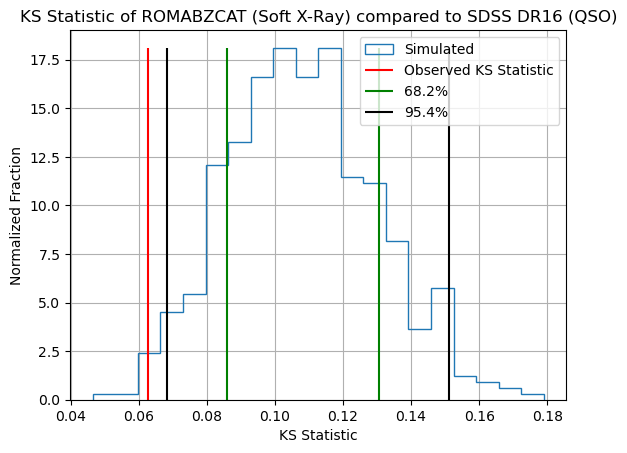

In [290]:
# 4lac TEV vs sdss

ks_stats = []
bins = 20

mc_data = mc_soft_xrays
stat_from_table = 0.0628

len_data = len(soft_xrays)
for i in range(int(len(mc_data)/len_data)):
    ks_stats.append(stats.ks_2samp(sdss_dr16.Voidiness[is_qsr], mc_data[len_data*i:len_data*(i+1)])[0])


stats_on_stats = plt.hist(ks_stats, 
        bins = bins, 
        density=True, 
        stacked = False,
        histtype='step',
        cumulative=False,
        label="Simulated")
plt.ylabel("Normalized Fraction")
plt.xlabel("KS Statistic")
plt.title("KS Statistic of ROMABZCAT (Soft X-Ray) compared to SDSS DR16 (QSO)")
plt.grid()
vline_height = max(stats_on_stats[0])
plt.vlines(stat_from_table, 0, vline_height, color="r", label = "Observed KS Statistic") # Grabbed from KS_2samp table above.

for sig, c in zip([34.1, 34.1+13.6], ["green", "black"]):
    perc = np.percentile(ks_stats, [50-sig])
    plt.vlines(perc, 0, vline_height, label=f'{sig*2}%', color=c)
    perc = np.percentile(ks_stats, [50+sig])
    plt.vlines(perc, 0, vline_height, color=c)

plt.legend()
plt.savefig('stats/stats_fig/KSSoftXrays.png')

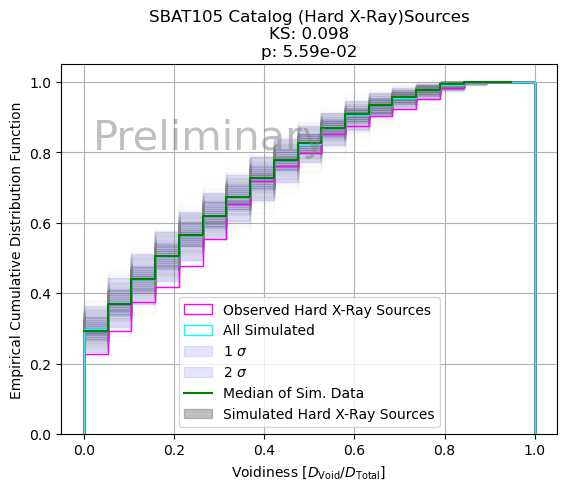

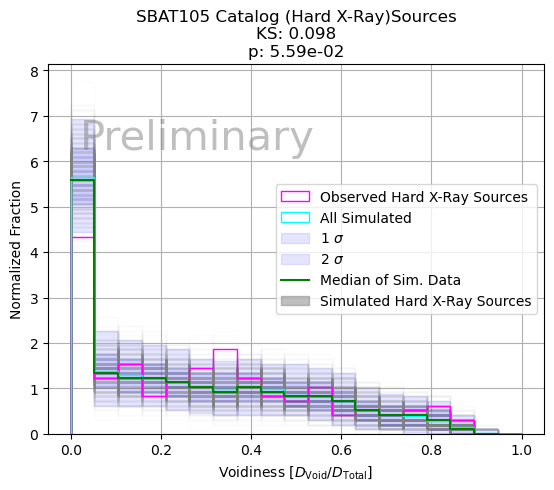

In [291]:
start = 0
end = 1
num = 20
binning = np.linspace(start,end,num)

sigma_vals = [34.1, 34.1+13.6]
observed_data = hard_xrays.Voidiness
observed_label = "Observed Hard X-Ray Sources"
observed_color = "magenta"
len_data = len(observed_data)
mc_data = mc_hard_xrays
plot_median = True
median_c = 'g'
cflag = True # cumulative
show_sim_overlay = True
fill_btwn_c = 'b'
fill_alpha = 0.1
plot_sdss = True
sdss_color = 'k'
title = 'SBAT105 Catalog (Hard X-Ray)Sources'
xlabel = 'Voidiness [$D_{\\rm Void}/D_{\\rm Total}$] '
ylabel = 'Normalized Fraction'
appended_label = 'Simulated Hard X-Ray Sources'

for oof in [True, False]:
    plt.figure()
    plot_everything(num
                    ,binning
                    , sigma_vals
                    , observed_data
                    , observed_label
                    , observed_color
                    , len_data
                    , mc_data
                    , plot_median
                    , median_c
                    , oof
                    , show_sim_overlay
                    , fill_btwn_c
                    , fill_alpha
                    , title
                    , xlabel
                    , ylabel
                    , appended_label
                    , plot_sdss_glx=False
                    , plot_sdss_qsr=False
                    )

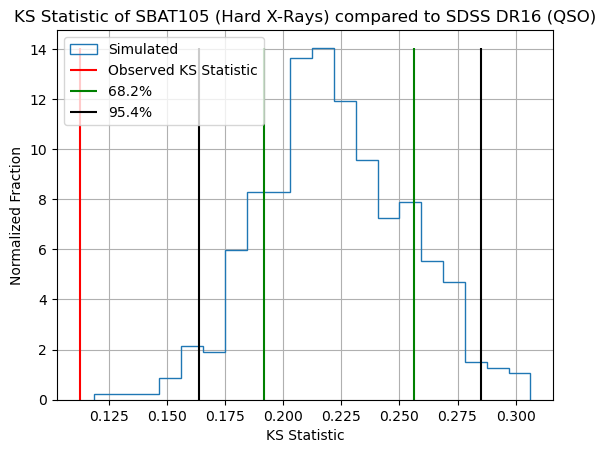

In [292]:
# 4lac TEV vs sdss

ks_stats = []
bins = 20

mc_data = mc_hard_xrays
stat_from_table = 0.1124

len_data = len(hard_xrays)
for i in range(int(len(mc_data)/len_data)):
    ks_stats.append(stats.ks_2samp(sdss_dr16.Voidiness[is_qsr], mc_data[len_data*i:len_data*(i+1)])[0])


stats_on_stats = plt.hist(ks_stats, 
        bins = bins, 
        density=True, 
        stacked = False,
        histtype='step',
        cumulative=False,
        label="Simulated")
plt.ylabel("Normalized Fraction")
plt.xlabel("KS Statistic")
plt.title("KS Statistic of SBAT105 (Hard X-Rays) compared to SDSS DR16 (QSO)")
plt.grid()
vline_height = max(stats_on_stats[0])
plt.vlines(stat_from_table, 0, vline_height, color="r", label = "Observed KS Statistic") # Grabbed from KS_2samp table above.

for sig, c, l in zip([34.1, 34.1+13.6], ["green", "black"], ["1 $\sigma$", "2 $\sigma$"]):
    perc = np.percentile(ks_stats, [50-sig])
    plt.vlines(perc, 0, vline_height, label=f'{sig*2}%', color=c)
    perc = np.percentile(ks_stats, [50+sig])
    plt.vlines(perc, 0, vline_height, color=c)

plt.legend()
plt.savefig('stats/stats_fig/KSHardXrays.png')

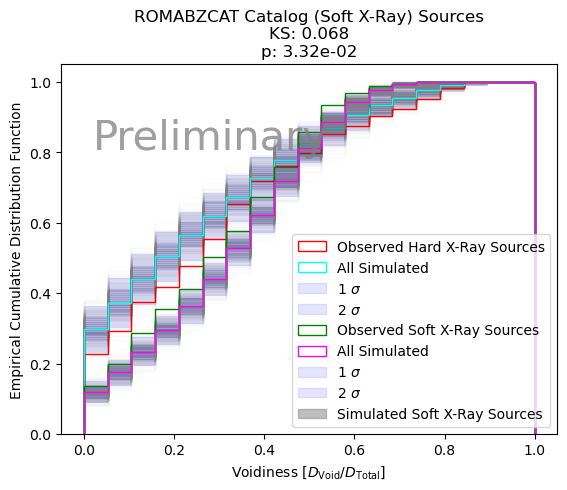

In [293]:
# Plot the xrays together

# Common variables~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
start = 0
end = 1
num = 20
binning = np.linspace(start,end,num)
sigma_vals = [34.1, 34.1+13.6]
plot_median = False
cflag = True
show_sim_overlay = True
fill_btwn_c = 'b'
fill_alpha = 0.1
xlabel = 'Voidiness [$D_{\\rm Void}/D_{\\rm Total}$] '
ylabel = 'Normalized Fraction'

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# MASTER LISTS
observed_data  = [] 
observed_label = [] 
observed_color = [] 
len_data       = [] 
mc_data        = []
median_c       = [] 
title          = [] 
appended_label = [] 
all_sim_c = []

# HARD X-RAYS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
observed_data.append(hard_xrays.Voidiness)
observed_label.append("Observed Hard X-Ray Sources")
observed_color.append("red")
len_data.append(len(hard_xrays.Voidiness))
mc_data.append(mc_hard_xrays)
median_c.append('magenta')
title.append('SBAT105 Catalog (Hard X-Ray)Sources')
appended_label.append('Simulated Hard X-Ray Sources')
all_sim_c.append('cyan')
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# SOFT X-RAYS~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
observed_data.append(soft_xrays.Voidiness)
observed_label.append("Observed Soft X-Ray Sources")
observed_color.append("green")
len_data.append(len(soft_xrays.Voidiness))
mc_data.append(mc_soft_xrays)
median_c.append('cyan')
title.append('ROMABZCAT Catalog (Soft X-Ray) Sources')
appended_label.append('Simulated Soft X-Ray Sources')
all_sim_c.append('magenta')
 
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for od, ol, oc, ld, md, mc, t, al, alc in zip(observed_data
                                          ,observed_label
                                          ,observed_color
                                          ,len_data
                                          ,mc_data
                                          ,median_c
                                          ,title
                                          ,appended_label,
                                          all_sim_c):
    plot_everything(num
                    ,binning
                    , sigma_vals
                    , od
                    , ol
                    , oc
                    , ld
                    , md
                    , plot_median
                    , mc
                    , cflag
                    , show_sim_overlay
                    , fill_btwn_c
                    , fill_alpha
                    , t
                    , xlabel
                    , ylabel
                    , al
                    , plot_sdss_glx=False
                    , plot_sdss_qsr=False
                    ,all_sim_c=alc
                    )



Text(0.5, 1.0, 'SDSS DR 16 (QSO)')

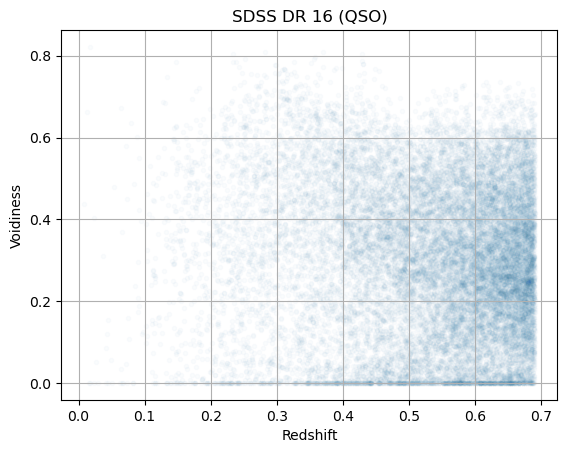

In [294]:
plt.figure()
plt.scatter(sdss_dr16.z[is_qsr], sdss_dr16.Voidiness[is_qsr], marker = '.', alpha = 0.02)
# plt.xlim((0.3616,0.3618))
# plt.ylim((0.524, 0.575))
plt.ylabel("Voidiness")
plt.xlabel("Redshift")
plt.grid()
plt.title("SDSS DR 16 (QSO)")

Text(0.5, 1.0, 'SDSS DR 16 (GLX)')

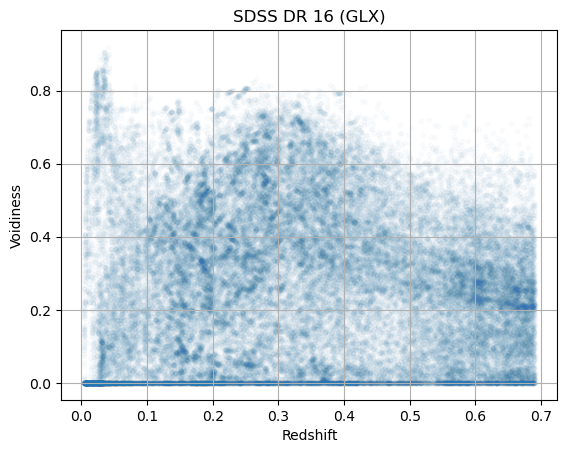

In [295]:
plt.figure()
plt.scatter(sdss_dr16.z[is_glx], sdss_dr16.Voidiness[is_glx], marker = '.', alpha = 0.02)
# plt.xlim((0.3616,0.3618))
# plt.ylim((0.524, 0.575))
plt.ylabel("Voidiness")
plt.xlabel("Redshift")
plt.grid()
plt.title("SDSS DR 16 (GLX)")

Text(0.5, 1.0, 'haRD XRYA\nPearson Correlation Coeff: 0.066\np-value: 0.373')

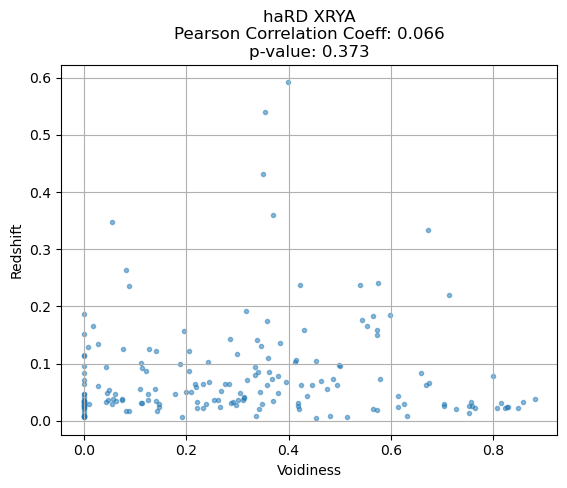

In [296]:
plt.figure()
# plt.scatter(hard_xrays.z, hard_xrays.Voidiness, marker = '.', alpha = 0.5)
plt.scatter(hard_xrays.Voidiness, hard_xrays.z, marker = '.', alpha = 0.5)
# plt.scatter(soft_xrays.z, )
# plt.xlim((0.3616,0.3618))
# plt.ylim((0.524, 0.575))
plt.xlabel("Voidiness")
plt.ylabel("Redshift")
# plt.ylim((0.000001, 0.2))
plt.grid()

corr_test= stats.pearsonr(hard_xrays.Voidiness, hard_xrays.z)
plt.title(f"haRD XRYA"+
          f"\nPearson Correlation Coeff: {corr_test[0]:.3f}"+
          f"\np-value: {corr_test[1]:.3f}")

Text(0.5, 1.0, 'soFt XRYA')

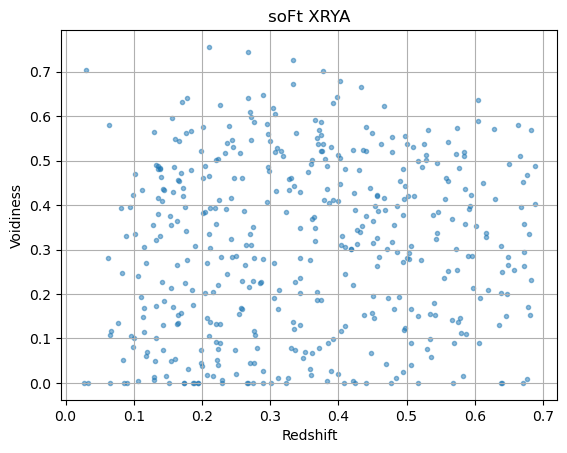

In [297]:
plt.figure()
plt.scatter(soft_xrays.z, soft_xrays.Voidiness, marker = '.', alpha = 0.5)
# plt.xlim((0.3616,0.3618))
# plt.ylim((0.524, 0.575))
plt.ylabel("Voidiness")
plt.xlabel("Redshift")
plt.grid()
plt.title("soFt XRYA")

Text(0, 0.5, 'Normalized Fraction')

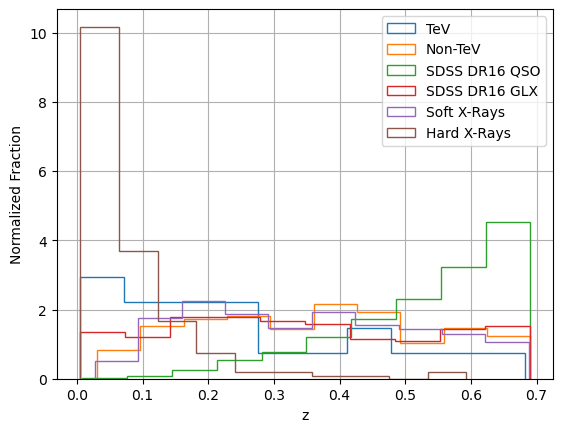

In [298]:
data = [four_lac.z[is_tev].copy()
        , four_lac.z[~is_tev].copy()
        , sdss_dr16.z[is_qsr].copy()
        , sdss_dr16.z[is_glx].copy()
        , soft_xrays.z
        , hard_xrays.z]
labels = ["TeV"
          , "Non-TeV"
          , "SDSS DR16 QSO"
          , "SDSS DR16 GLX"
          , "Soft X-Rays"
          , "Hard X-Rays"]
for hm, l, b in zip(data, labels, [10, 10, 10, 10, 10, 10]):
    plt.hist(hm
             ,bins = b
             ,histtype="step"
             ,cumulative=False
             ,label = l
             , density=True
             ,stacked=False
             )
plt.legend()
plt.grid()
plt.xlabel("z")
plt.ylabel("Normalized Fraction")

Redshift vs. Voidiness Analysis

In [299]:
def void_vs_z(df,title=None, bins = np.linspace(0, 0.7, 8), colors = None, label=None, alpha = 0.1):
    # fig, ax = plt.figure()
    lbools = ret_bin_bools(df, bins)


    # Returns step function of the contours
    med, one_sig, two_sig =  ret_mid_1s_2s(df, lbools)
    bin_centers = [(bins[i+1]+ bins [i])/2 for i in range(len(bins)-1)]
    # Plot the median
    left_bins = bins[:-1]
    right_bins = bins[1:]
    plt.step(left_bins,med,where='post', label="Median")

    # Plot the sigma contours
    for s ,l in zip([one_sig, two_sig], [1, 2]):
        plt.fill_between(left_bins, s[0], s[1]
                        , step="post"
                        , alpha = 0.4
                        , color = 'g'
                        , label=f"{l} $\sigma$"
                        #  , edgecolor = 'orange'
                        )
    for boolean in lbools:
        if colors is None:
            plt.scatter(df.z[boolean], df.Voidiness[boolean]
                        ,label=label
                        , alpha=alpha
                        , marker='.',
                        c='k')
        else:
            plt.scatter(df.z[boolean], df.Voidiness[boolean]
                        ,label=label
                        , alpha=alpha
                        , marker='.'
                        , c=colors)
    plt.xlabel('z')
    plt.ylabel('Voidiness')

    # # ax = plt.gca()
    # legends = ax.get_legend()
    # if legends is not None:
    plt.legend()
    
    if title is not None:
        plt.title(title)
    plt.grid()

def ret_bin_bools(df, bins):
    """Returns list of booleans where the rows fall between the bin edges.
    FILTERS BY REDSHIFT"""
    lbools = []
    for i in range(len(bins)-1):
        lbools.append((df.z < bins[i+1]) & (df.z > bins[i]))
    return lbools

def ret_mid_low_hi(df, lbools):
    """Measured at the 84.1 percentile and 95th percentil. 
    May not be accurate for low statistics"""
    meds = []
    one_sig_lo = []
    one_sig_hi = []
    two_sig_lo  = []
    two_sig_hi = []
    for lb in lbools:
        meds.append(np.median(df.Voidiness[lb]))
        one_sig_hi.append(np.percentile(df.Voidiness[lb], 50+34.1))
        two_sig_hi.append(np.percentile(df.Voidiness[lb], 50+34.1+13.6))
        one_sig_lo.append(np.percentile(df.Voidiness[lb], 50-34.1))
        two_sig_lo.append(np.percentile(df.Voidiness[lb], 50-34.1-13.6))

def ret_mid_1s_2s(df, lbools):
    meds = []
    one_sig_lo = []
    one_sig_hi = []
    two_sig_lo  = []
    two_sig_hi = []
    for lb in lbools:
        data = df.Voidiness[lb]
        med = np.median(data)
        meds.append(med)
        sigma = np.std(data)
        one_sig_hi.append(med+sigma)
        one_sig_lo.append(med-sigma)
        two_sig_hi.append(med+2*sigma)
        two_sig_lo.append(med-2*sigma)


    return (meds, [one_sig_hi, one_sig_lo], [two_sig_hi, two_sig_lo])

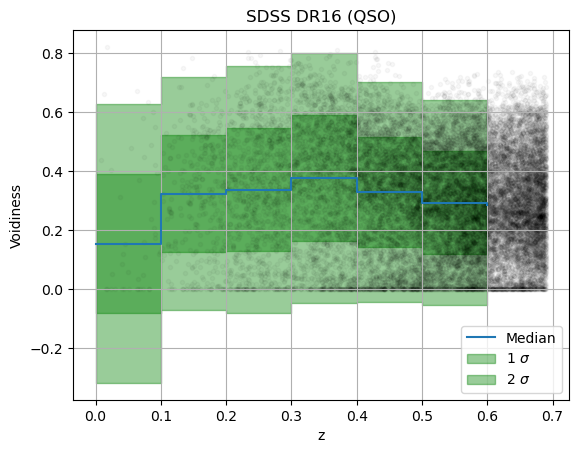

In [300]:
void_vs_z(sdss_dr16[is_qsr],alpha=0.03, title="SDSS DR16 (QSO)")

/Users/juiceable/mambaforge/envs/astropy-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/juiceable/mambaforge/envs/astropy-env/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


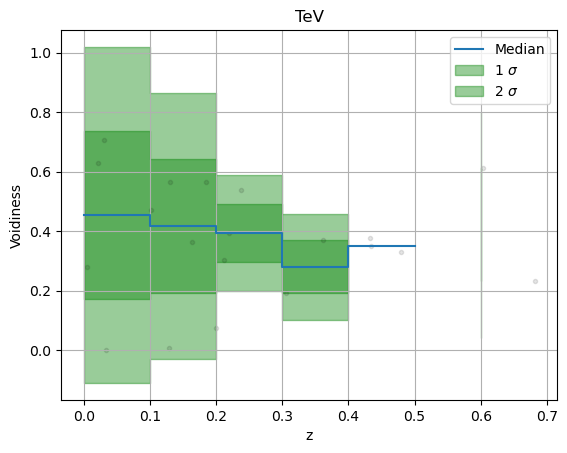

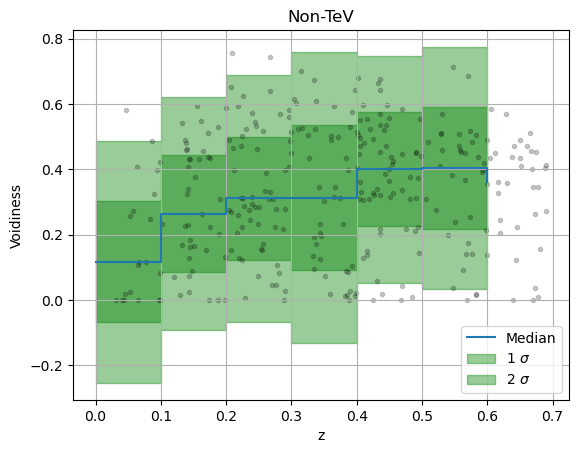

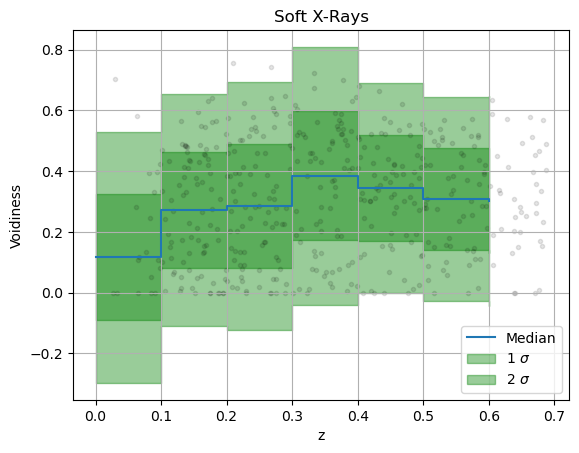

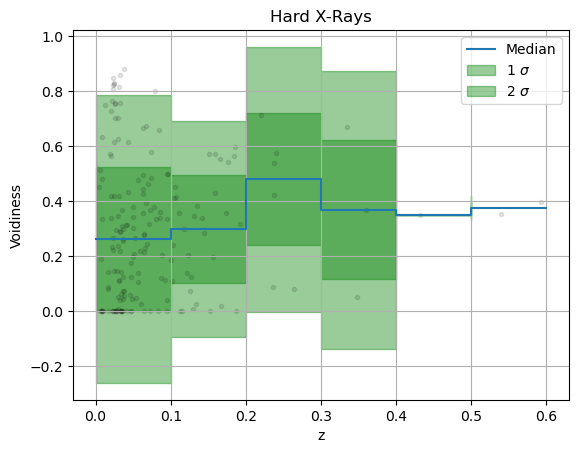

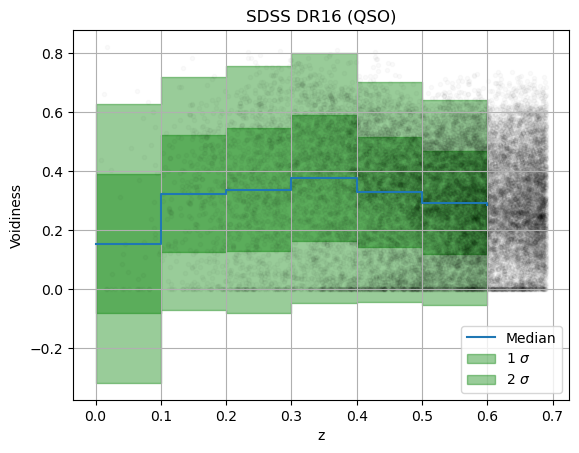

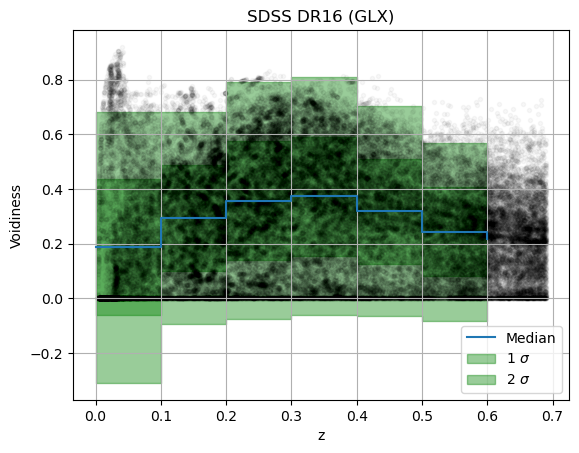

In [301]:
data = [four_lac[is_tev]
        , four_lac[~is_tev]
        , soft_xrays
        , hard_xrays
        , sdss_dr16[is_qsr]
        , sdss_dr16[is_glx]
        ]
titles = ["TeV"
          , "Non-TeV"
          , "Soft X-Rays"
          , "Hard X-Rays"
          , "SDSS DR16 (QSO)"
          , "SDSS DR16 (GLX)"]
alphas = [0.1
          ,0.2
          ,0.1
          ,0.1
          ,0.02
          ,0.03]
for i in range(len(data)):
    plt.figure()
    void_vs_z(data[i], title=titles[i], alpha=alphas[i])
#     plt.savefig("stats/stats_fig/z_vs_voidiness"+titles[i]+".png")

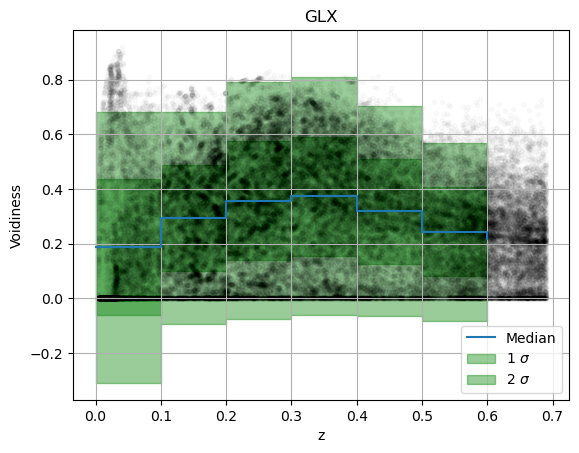

In [302]:
void_vs_z(sdss_dr16[is_glx], title="GLX", alpha=0.02)

In [303]:
# void_vs_z(four_lac[is_tev], title="TeV", alpha=0.5)

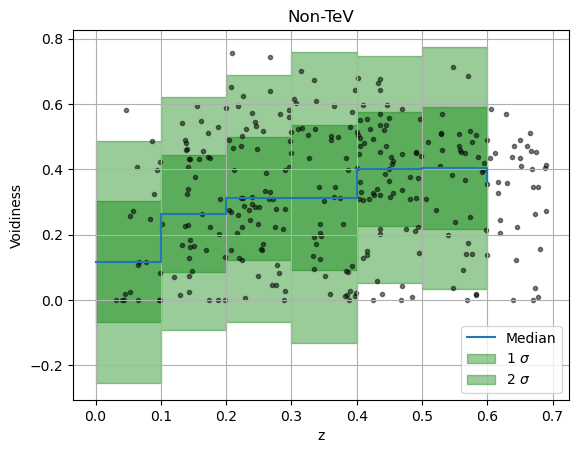

In [304]:
void_vs_z(four_lac[~is_tev], title="Non-TeV", alpha=0.5)

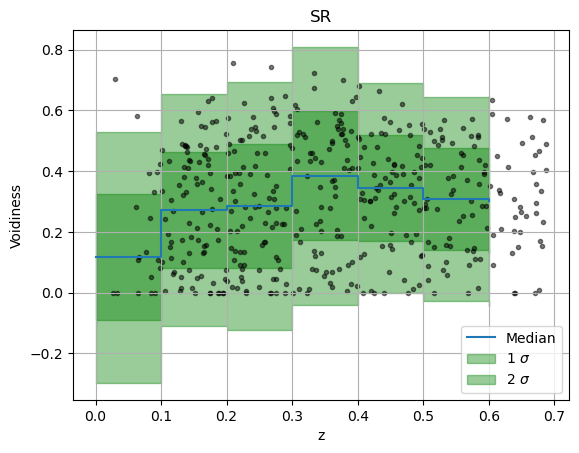

In [305]:
void_vs_z(soft_xrays, title="SR", alpha=0.5)

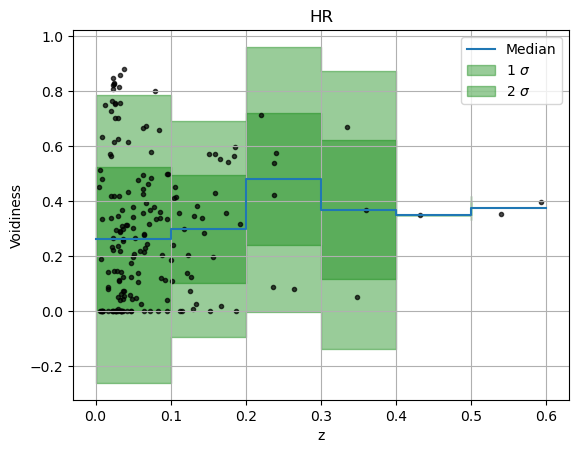

In [306]:
void_vs_z(hard_xrays, title="HR", alpha= 0.7)

In [307]:
bins
lbools = ret_bin_bools(sdss_dr16[is_qsr], bins)
med, one_sig, two_sig = ret_mid_low_hi(sdss_dr16[is_qsr], lbools)

TypeError: object of type 'int' has no len()

In [ ]:
len(med)

In [ ]:
plt.step(bins[1:], med, where="post")

In [ ]:
len(med)

In [ ]:
bin_centers = [(bins[i+1]+ bins [i])/2 for i in range(len(bins)-1)]

In [ ]:
bins[:-1]

In [ ]:
bins